In [46]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [47]:
from google.colab import userdata
api_key = userdata.get('cos_api_key')

In [49]:
import pandas as pd
exchange = pd.read_csv('/content/exchange_2000_2024.csv')

# 외환보유액 가설 재검증 (4, 4-1, 5, 6) : 외화 변화량으로 다시 확인

[가설 4] 외화보유액이 증가할수록 환율은 떨어질 것이다.

[가설 4-1] 경제심리지수가 낮아질수록 외환보유액은 증가할 것이다

[가설 5] 외환보유액과 환율은 정책적 이벤트에 영향을 받는다.

[가설 6] 외국인 투자금액이 늘면 외환보유액이 증가한다.


**왜?**
- 결국 외화보유액은 누적되는 것이므로 확실하게 영향을 받아 얼마나 변화하는지 봐야함.

- 목적이 영향 관계 이므로 원인 -> 결과 (변화량) 으로 분석해보기로 했다.

- "외국인 투자자금이 얼마나 유입되었는가 → 그에 따라 외환보유액이 얼마나 바뀌었는가" : 인과 해석

In [50]:
# 외환보유액 변화량 계산
exchange['외환보유액_변화'] = exchange['한국 외환 보유액'].diff()

# 상관계수 계산 (다른 변수는 원시값 사용)
corr_4 = exchange[['외환보유액_변화', '원/달러환율']].corr().iloc[0, 1]
corr_4_1 = exchange[['경제 심리 지수','외환보유액_변화']].corr().iloc[0, 1]
corr_6 = exchange[['외국인 투자 금액','외환보유액_변화']].corr().iloc[0, 1]

print(f"[가설 4] 외환보유액 변화 ↔ 환율 상관계수: {corr_4:.3f}")
print(f"[가설 4-1] 외환보유액 변화 ↔ 경제심리지수 상관계수: {corr_4_1:.3f}")
print(f"[가설 6] 외환보유액 변화 ↔ 외국인 투자금액 상관계수: {corr_6:.3f}")

[가설 4] 외환보유액 변화 ↔ 환율 상관계수: -0.205
[가설 4-1] 외환보유액 변화 ↔ 경제심리지수 상관계수: 0.139
[가설 6] 외환보유액 변화 ↔ 외국인 투자금액 상관계수: -0.143


In [51]:
# TIME 컬럼을 datetime으로 변환 (필요 시)
exchange["TIME"] = pd.to_datetime(exchange["TIME"])  # 문자열 or Period → datetime
exchange = exchange.set_index("TIME")

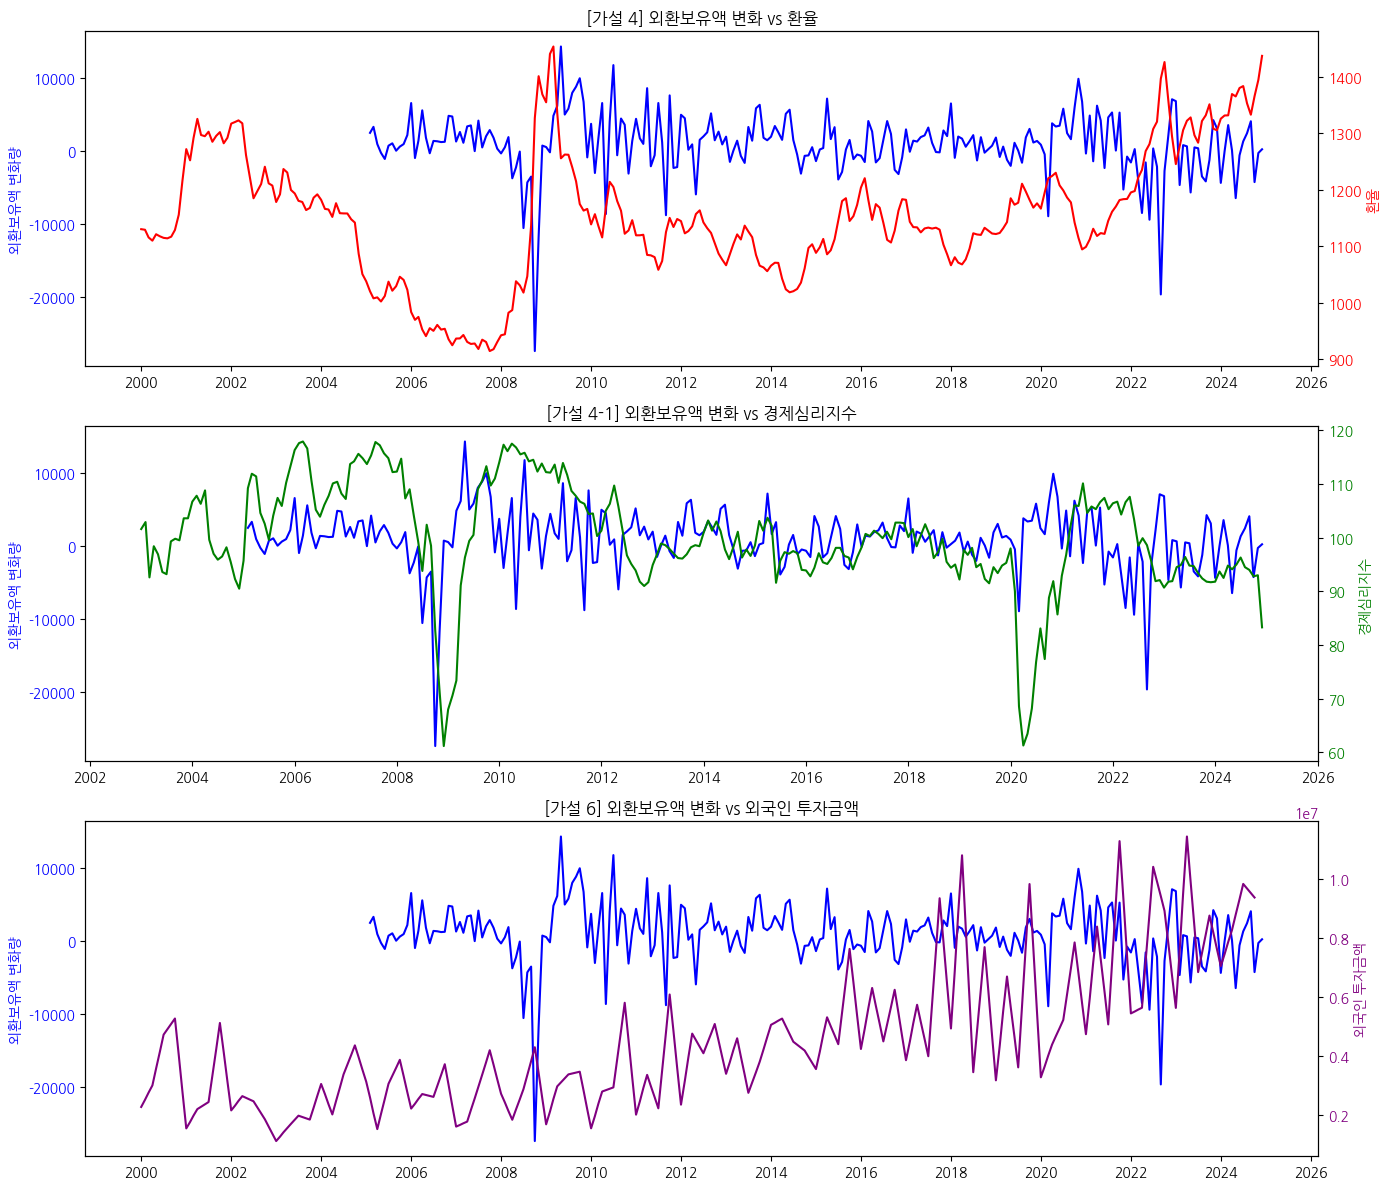

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# 가설 4
ax1 = axes[0]
ax1.plot(exchange.index, exchange['외환보유액_변화'], color='blue', label='외환보유액 변화량')
ax1.set_ylabel('외환보유액 변화량', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax1b = ax1.twinx()
ax1b.plot(exchange.index, exchange['원/달러환율'], color='red', label='환율')
ax1b.set_ylabel('환율', color='red')
ax1b.tick_params(axis='y', labelcolor='red')

ax1.set_title('[가설 4] 외환보유액 변화 vs 환율')

# 가설 4-1
ax2 = axes[1]
ax2.plot(exchange.index, exchange['외환보유액_변화'], color='blue', label='외환보유액 변화량')
ax2.set_ylabel('외환보유액 변화량', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax2b = ax2.twinx()
ax2b.plot(exchange.index, exchange['경제 심리 지수'], color='green', label='경제심리지수')
ax2b.set_ylabel('경제심리지수', color='green')
ax2b.tick_params(axis='y', labelcolor='green')

ax2.set_title('[가설 4-1] 외환보유액 변화 vs 경제심리지수')

# 가설 6
ax3 = axes[2]
ax3.plot(exchange.index, exchange['외환보유액_변화'], color='blue', label='외환보유액 변화량')
ax3.set_ylabel('외환보유액 변화량', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax3b = ax3.twinx()
ax3b.plot(exchange.index, exchange['외국인 투자 금액'], color='purple', label='외국인 투자금액')
ax3b.set_ylabel('외국인 투자금액', color='purple')
ax3b.tick_params(axis='y', labelcolor='purple')

ax3.set_title('[가설 6] 외환보유액 변화 vs 외국인 투자금액')

plt.tight_layout()
plt.show()


## **[가설 4] 외환보유액 변화량 vs 환율**

**그래프 해석**

- 환율(빨간색)은 전체적으로는 상승 추세이지만, 외환보유액 변화량(파란색)은 그와 뚜렷한 반대 흐름 없이 진폭이 큰 형태.

- 큰 폭의 외환보유액 감소(예: 금융위기, 2022년) 이후에도 환율은 일부 시점에선 되려 안정되거나 상승 지속.

**결론**

- 외환보유액이 늘어난다고 해서 환율이 반드시 하락하지는 않음.

- 특히 외환보유액 변화량 기준에서는 환율과의 단기적 직접 연계성이 낮으며, 오히려 사후 대응적 성격(=환율 상승 → 보유액 변화)이 강함.

  → 가설 4는 약하게만 지지됨.
<br>

## **[가설 4-1] 외환보유액 변화량 vs 경제심리지수**

**그래프 해석**

- 외환보유액 변화량(파란색)과 경제심리지수(초록색)는 전반적으로 유사한 진폭을 가지며, 위기 시점에서 동반 하락 또는 반응하는 구간이 관찰됨 (예: 2008, 2020, 2022).

- 다만 평상시 구간에서는 큰 연계성은 관찰되지 않음.

**결론**

- 심리 위축기(지수 하락 시)에 외환보유액이 급변(감소)하는 구간이 존재하며, 경제심리지수는 위기 상황에서 보유액 급감과 일정한 관계가 있는 것으로 보임.
  → 가설 4-1은 위기 상황에선 지지됨, 그러나 일반 시점에선 약함.

<br>

## **[가설 6] 외국인 투자금액 vs 외환보유액 변화량**

**그래프 해석**

- 외국인 투자금액(보라색)은 장기적으로 완만한 증가세를 보이나 변동성이 큼.

- 외환보유액 변화량(파란색)은 특정 시점에서 급격한 진폭을 보이지만, 외국인 투자 흐름과 명확한 시계열 상 일치는 드러나지 않음.

**결론**

- 외국인 투자금액은 외환보유액에 기여할 수 있는 유입 요소 중 하나이지만, 직접적인 단기적 영향력을 판단하긴 어려움.

  → 가설 6은 장기적 추세에선 지지되나, 변화량 기준으로는 제한적 관계만 확인 가능함.

## **[가설 5] 외환보유액과 환율은 정책적 이벤트에 영향을 받는다.**

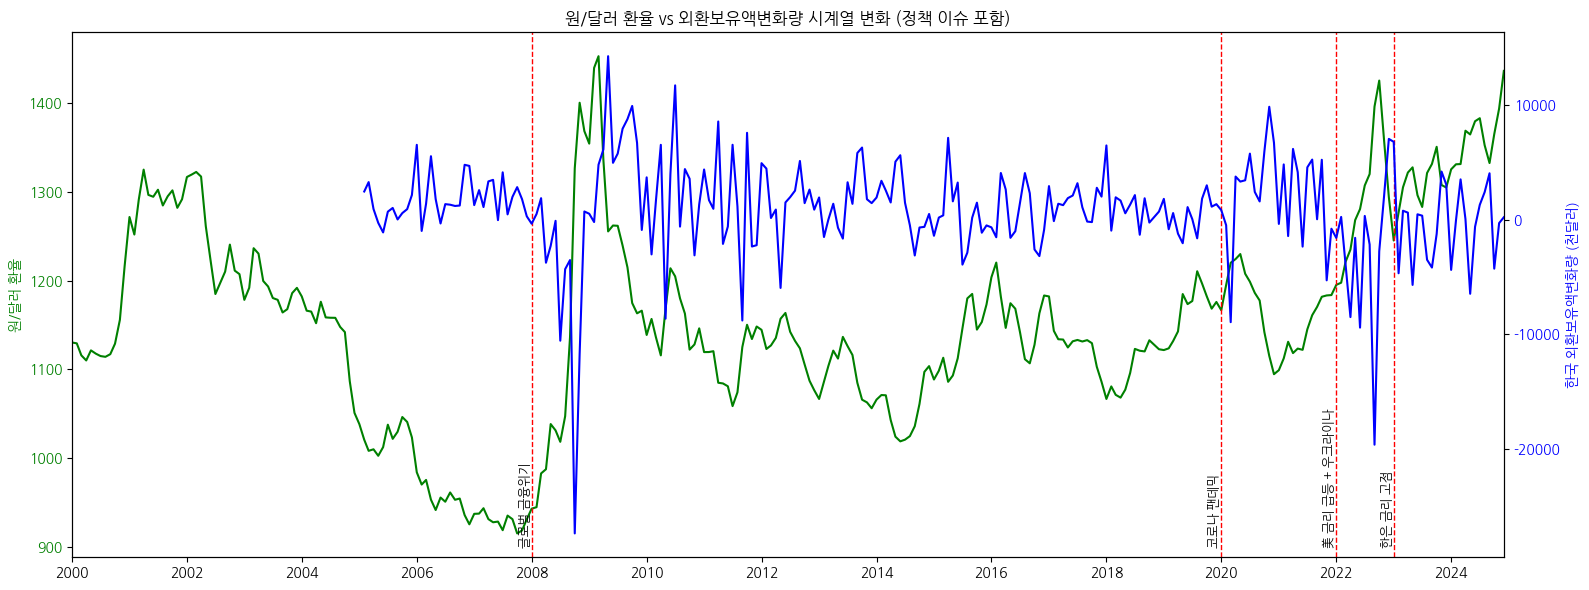

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 이벤트 연도 및 라벨
event_years = {
    "2008": "글로벌 금융위기",
    "2020": "코로나 팬데믹",
    "2022": "美 금리 급등 + 우크라이나",
    "2023": "한은 금리 고점"
}

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(16, 6))

# 왼쪽 축: 원/달러 환율
ax1.plot(exchange.index, exchange['원/달러환율'], color='green', label='원/달러 환율')
ax1.set_ylabel('원/달러 환율', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# 오른쪽 축: 외환보유액
ax2 = ax1.twinx()
ax2.plot(exchange.index, exchange['외환보유액_변화'], color='blue', label='외환보유액변화량 (천달러)')
ax2.set_ylabel('한국 외환보유액변화량 (천달러)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# 제목
plt.title("원/달러 환율 vs 외환보유액변화량 시계열 변화 (정책 이슈 포함)")

# 정책 이벤트 수직선과 라벨 표시 (안겹치도록 아래쪽으로)
for i, (year, label) in enumerate(event_years.items()):
    date = pd.to_datetime(f"{year}-01-01")
    ax1.axvline(date, color='red', linestyle='--', linewidth=1)
    ax1.text(date, ax1.get_ylim()[0] + 10, label, rotation=90,
             verticalalignment='bottom', horizontalalignment='right',
             fontsize=9, color='black')

# x축 연도 포맷 설정
ax1.set_xlim([exchange.index.min(), exchange.index.max()])
ax1.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


| 시점         | 주요 정책 이벤트           | 환율 변화                          | 외환보유액 변화                | 해석 요약 |
|--------------|----------------------------|------------------------------------|-------------------------------|------------|
| 2008         | 글로벌 금융위기            | 급등 (불안심리, 원화 약세)         | 급감 후 반등                  | 위기 대응 위한 보유액 사용 후 방어 |
| 2015         | 중국 증시 폭락             | 상승                                | 일시적 감소                   | 아시아 불안, 심리적 방어 |
| 2016         | 브렉시트                   | 소폭 상승                           | 큰 변화 없음                  | 국내 영향 제한적 |
| 2017         | 트럼프 취임                | 보합                                | 보합                           | 정치적 불확실성, 영향 미미 |
| 2018         | 미중 무역전쟁              | 점진적 상승                         | 점진적 감소                   | 불확실성 확대, 유출 방어 |
| 2020         | 코로나 팬데믹              | 급등 (~1300원대)                    | 급감                           | 위기 시 보유액 방어성 사용 |
| 2022         | 美 금리 급등 + 우크라이나 전쟁 | 급등 (~1400원 이상)               | 급감                           | 외국인 유출 + 방어 지출 |
| 2023         | 韓 기준금리 고점           | 환율 하락 후 재상승                | 회복 지연                     | 금리 하락 기대, 방어 한계 노출 |


- 정책 이벤트 시점(빨간 점선)마다 외환보유액의 급격한 증감과 환율의 급변이 관측됨.

- 특히 글로벌 금융위기(2008), 코로나 팬데믹(2020), **미국 금리 급등+우크라이나 전쟁(2022)**에서는 환율 급등 + 외환보유액 급감이 동시에 발생.

  이는 외환시장 방어를 위한 정책적 개입으로 해석 가능.

- 하지만 **최근(2023~)**에는 환율이 일정 수준에서 유지되는데도 외환보유액 회복이 더딤.

  이는 정책 대응 한계 혹은 외화 유입 둔화로 해석 가능.

[가설 5] 외환보유액과 환율은 정책 이벤트에 영향을 받는다

**결론**


- 주요 정책 이벤트(금리 급등, 전쟁, 팬데믹 등)가 발생할 때,

  ▶ 환율 급등과 외환보유액 급감이 반복적으로 나타남.

- 이는 중앙은행의 외환시장 개입 시기와 정확히 일치하며,

  ▶ 외환보유액은 정책적 대응의 수단이자 정책 이벤트 반응 지표로 작용.

▶ 외환보유액은 정책 충격에 민감하게 반응한다는 점에서, 해당 가설은 타당하며 유의미한 설명력을 가짐.

```
[경제심리지수 ↓] ───▶ [위기 인식]
                             │
                             ▼
                  [환율 ↑ : 원화 약세]
                             │
                             ▼
       [외환보유액 방어 개입 (중앙은행)]
                             │
                             ▼
      [외환보유액 변화량 발생 (↓ 또는 ↑)]
```

> ※ 외국인 투자금액은 독립적 흐름 (상관도 낮음)  
> → 장기적으로는 자산시장 구조와 연동 가능성


## [가설 5] 사건별 변화 박스플롯(전후 6개월)

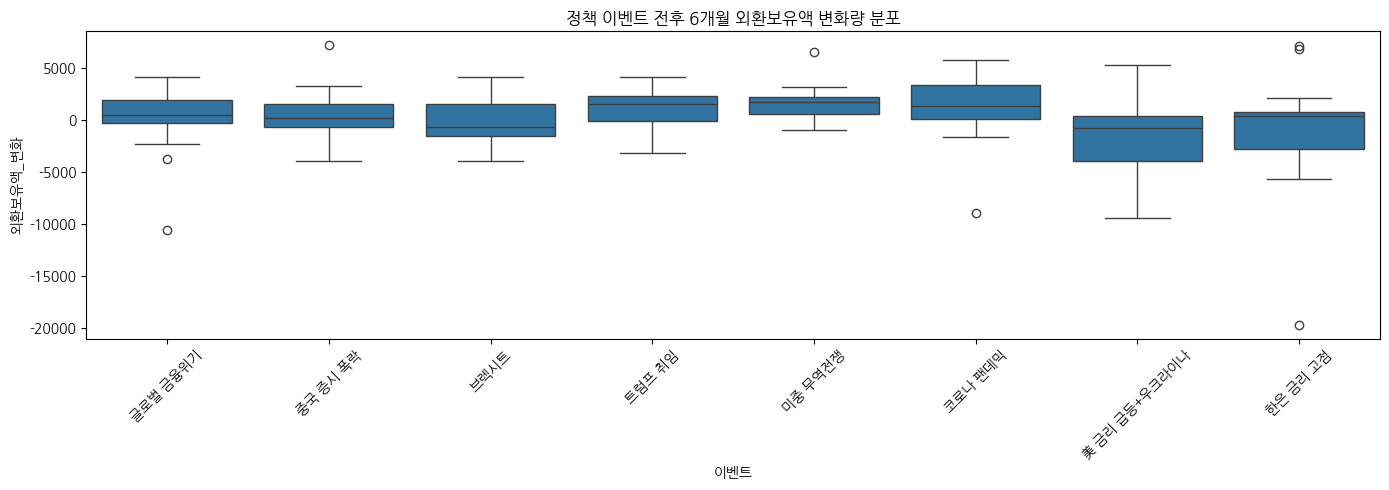

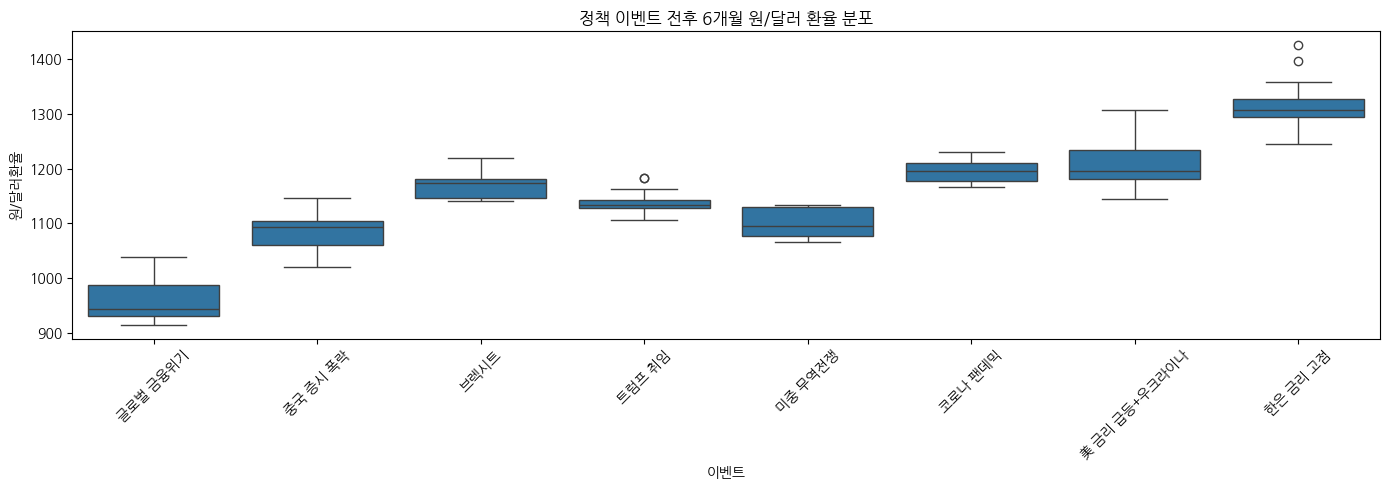

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 정책 이벤트 시점 정의
event_years = {
    "2008": "글로벌 금융위기",
    "2015": "중국 증시 폭락",
    "2016": "브렉시트",
    "2017": "트럼프 취임",
    "2018": "미중 무역전쟁",
    "2020": "코로나 팬데믹",
    "2022": "美 금리 급등+우크라이나",
    "2023": "한은 금리 고점"
}

# 전처리용 빈 리스트
fx_data = []

for year, label in event_years.items():
    event_date = pd.Timestamp(f"{year}-01-01")

    # 전후 6개월 데이터 필터링
    mask = (exchange.index >= event_date - pd.DateOffset(months=6)) & \
           (exchange.index <= event_date + pd.DateOffset(months=6))

    temp = exchange.loc[mask, ['외환보유액_변화', '원/달러환율']].copy()
    temp['이벤트'] = label
    fx_data.append(temp)

# 하나의 DataFrame으로 합치기
plot_df = pd.concat(fx_data)

# 시각화 - 외환보유액 변화량 박스플롯
plt.figure(figsize=(14, 5))
sns.boxplot(data=plot_df, x='이벤트', y='외환보유액_변화')
plt.title('정책 이벤트 전후 6개월 외환보유액 변화량 분포')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 시각화 - 환율 박스플롯
plt.figure(figsize=(14, 5))
sns.boxplot(data=plot_df, x='이벤트', y='원/달러환율')
plt.title('정책 이벤트 전후 6개월 원/달러 환율 분포')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


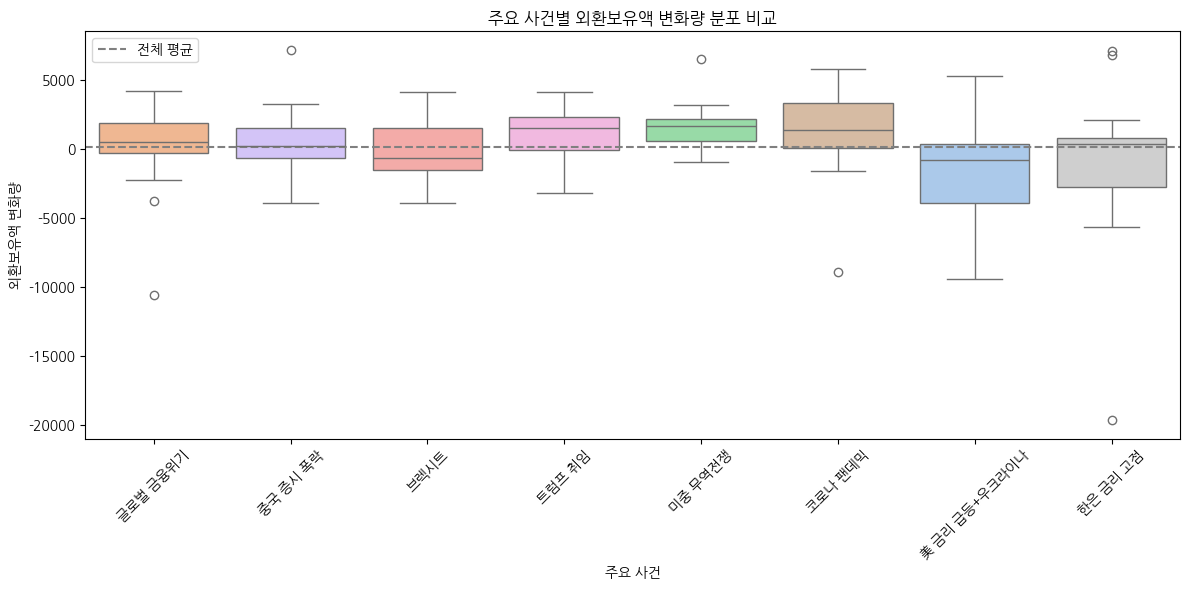

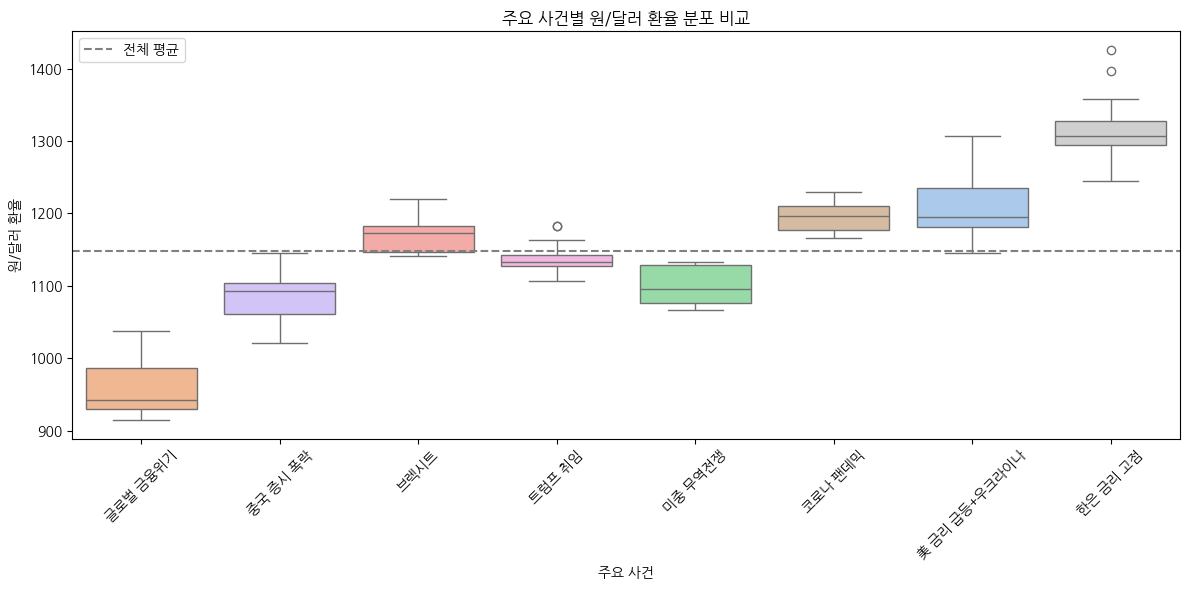

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이벤트 카테고리 목록 고정 (순서도 보장)
event_order = sorted(plot_df['이벤트'].unique())

# 파스텔 팔레트 지정 (카테고리 수에 맞게 명시적 매핑)
colors = sns.color_palette("pastel", n_colors=len(event_order))
palette = dict(zip(event_order, colors))

# 외환보유액 변화량
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_df, x='이벤트', y='외환보유액_변화', hue='이벤트', palette=palette, dodge=False, legend=False)
plt.axhline(plot_df['외환보유액_변화'].mean(), color='gray', linestyle='--', label='전체 평균')
plt.title('주요 사건별 외환보유액 변화량 분포 비교')
plt.xlabel('주요 사건')
plt.ylabel('외환보유액 변화량')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 원/달러 환율
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_df, x='이벤트', y='원/달러환율', hue='이벤트', palette=palette, dodge=False, legend=False)
plt.axhline(plot_df['원/달러환율'].mean(), color='gray', linestyle='--', label='전체 평균')
plt.title('주요 사건별 원/달러 환율 분포 비교')
plt.xlabel('주요 사건')
plt.ylabel('원/달러 환율')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


- 외환보유액_변화
  
  : 이 그래프는 주요 정책 이벤트 발생 전후 6개월 동안의 외환보유액 변화량의 분포를 나타냅니다.

정책 이벤트|	외환보유액 변화 해석
-----------|-----------
글로벌 금융위기 (2008)|	큰 폭의 하락 구간 존재 → 외환보유액 급감으로 시장 방어 시도 추정 가능
코로나 팬데믹 (2020)|	변화량 분포는 크지만 중앙값은 양수 → 초기 대응 이후 방어적 유입 가능성
美 금리 급등 + 우크라이나 (2022)	|외환보유액 급격한 감소 분포 존재 → 외환시장 개입 추정 가능
그 외 사건들	| 대부분 변화량은 ±수천 단위로 제한적 → 정책 대응 영향은 상대적으로 미약


대규모 외환시장 충격이 있는 이벤트일수록 외환보유액 변화량의 분포 폭이 크고, 일부 사건에서는 외환보유액 급감이 관측됨. 이는 외환보유액이 정책적 대응 수단으로 사용되었음을 시사함.



- 원/달러 환율

  : 이 그래프는 동일한 기간 동안 원/달러 환율의 분포를 보여주며, 시장 반응을 간접적으로 관찰할 수 있습니다.


  정책|이벤트	환율 변화 해석
  ------|---------------
글로벌 금융위기 (2008)	|중앙값 950원대 → 상대적으로 안정적 (초기 반응)
브렉시트, 미중 무역전쟁, 팬데믹, 금리이슈	|사건별 환율 분포가 뚜렷이 상승
美 금리 급등 + 우크라이나 (2022)	|중앙값 1200원 이상, 분산도 큼 → 불안정성 증가
한은 금리 고점 (2023)	|환율 고점 구간 집중 → 고환율 지속 현상 반영

정책 이벤트 직후에는 환율이 대부분 상승하는 경향이 있으며, **특정 이벤트(2022, 2023)**에서는 명확한 고환율 구간이 형성됨. 이는 시장의 불안 심리와 정책 신뢰도에 대한 반응으로 해석 가능함.

### [가설 5] 결론

외환보유액과 환율 모두 정책 이벤트 전후에 명확한 분포 변화가 나타남.

특히 2008, 2020, 2022년과 같이 전 세계적 충격을 동반한 이벤트에서는 두 지표 모두 극단적 변화가 관측됨.

이는 정책적 이벤트가 외환보유액 운용과 환율에 실질적 영향을 준다는 증거이며, 해당 가설을 강하게 뒷받침함.



## **[가설 7] 경상수지가 흑자일수록 외환보유액변화량은 증가추세이다.**

[가설 7] 외환보유액 변화 vs 경상수지 상관계수: 0.026


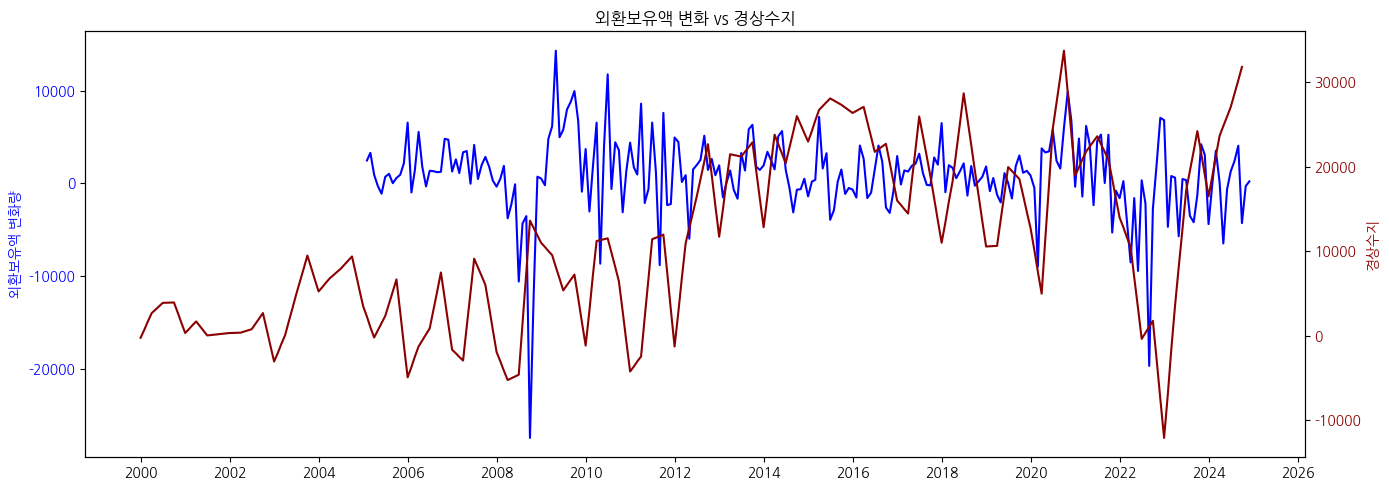

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 상관계수
corr_g7 = exchange[["한국 경상수지", "외환보유액_변화"]].corr().iloc[0, 1]
print(f"[가설 7] 외환보유액 변화 vs 경상수지 상관계수: {corr_g7:.3f}")

# 시계열 시각화
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(exchange.index, exchange["외환보유액_변화"], color='blue', label='외환보유액 변화량')
ax1.set_ylabel('외환보유액 변화량', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax2 = ax1.twinx()
ax2.plot(exchange.index, exchange["한국 경상수지"], color='darkred', label='경상수지')
ax2.set_ylabel('경상수지', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title("외환보유액 변화 vs 경상수지")
plt.tight_layout()
plt.show()


| 구간 | 경상수지 흐름 | 외환보유액 변화량 흐름 | 해석 |
|------|----------------|------------------------|------|
| 2008년 | 급락 | 급락 | 금융위기 영향, 동반 하락이지만 시점·진폭 다름 |
| 2009~2012년 | 회복 및 흑자 지속 | 대체로 증가 | 경상수지 흑자 → 외환보유액 증가 흐름 일부 관측 |
| 2016~2018년 | 안정적 흑자 | 진폭 반복 (불규칙) | 경상수지는 안정적이나 외환보유액은 급등·급락 반복 |
| 2021~2022년 | 안정적 | 급감 | 경상수지 유지에도 외환보유액 급감 → 정책 개입 가능성 |
| 2023~2024년 | 급격한 흑자 증가 | 외환보유액 증가 | 일시적 동반 증가, 흐름 유사 |


### **[가설 7] 결론**

분석된 상관계수는 **+0.026**으로,

외환보유액 변화량과 경상수지 간의 통계적 상관관계는 거의 없거나 매우 약함을 보여준다.


▶ 경상수지는 원화 유입의 주요 경로 중 하나이긴 하지만,

▶ 실제 **외환보유액 변화는 정책적 개입, 외환시장 안정화 노력, 환율 방어 등의 요인에 더 강하게 반응하는 경향**이 있다.

또한,

경상수지가 흑자임에도 보유액이 감소하는 구간이 존재하며,

이는 외환보유액이 단순한 수지의 축적 결과라기보다는,

외환시장 수급 상황과 정부의 외환 정책에 따라 적극적으로 운용되는 관리형 지표임을 시사한다.

* 요약

경상수지와 외환보유액 변화량 간에는 실질적인 상관관계가 거의 없으며,

외환보유액은 경상수지보다도 환율 상황, 외자 유출입, 정책 개입 등에 더 민감하게 반응한다.

따라서 이 가설은 데이터 상 지지되지 않으며,

외환보유액 증가의 결정 요인을 경상수지 단일 변수로 설명하긴 어렵다.

## **[가설 8] 환율이 급등한 직후 외환보유액이 증가하면, 이는 정책적 방어의 결과일 것이다.**

[가설 8] 원/달러환율 vs 외환보유액_변화: -0.205


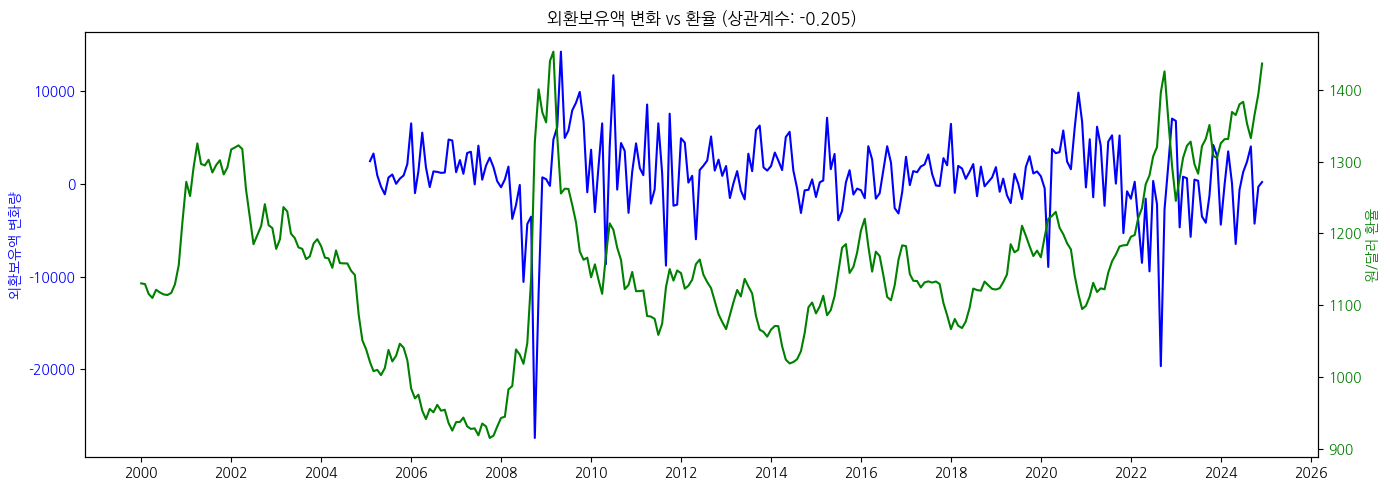

In [ ]:
# 상관계수 계산
corr_g8 = exchange[["원/달러환율", "외환보유액_변화"]].corr().iloc[0, 1]
print(f"[가설 8] 원/달러환율 vs 외환보유액_변화: {corr_g8:.3f}")

# 시계열 그래프
plt.figure(figsize=(14, 5))
ax2 = plt.gca()
ax2.plot(exchange.index, exchange["외환보유액_변화"], color='blue', label='외환보유액 변화량(단위: 천달러)')
ax2.set_ylabel('외환보유액 변화량', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax2b = ax2.twinx()
ax2b.plot(exchange.index, exchange["원/달러환율"], color='green', label='환율')
ax2b.set_ylabel('원/달러 환율', color='green')
ax2b.tick_params(axis='y', labelcolor='green')

ax2.set_title(f"외환보유액 변화 vs 환율 (상관계수: {corr_g8:.3f})")
ax2.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

| 시기 | 환율 흐름 | 외환보유액 변화량 흐름 | 해석 |
|------|-----------|------------------------|------|
| 2008년 글로벌 금융위기 | 급등 | 직후 급격히 증가 | 위기 대응을 위한 외환보유액 축적, 정책 개입 시점 |
| 2020년 코로나 팬데믹 | 급등 (~1300원) | 진폭 확대, 일시적 증가 | 불확실성 대응 목적의 단기적 보유액 증가 |
| 2022~2023년 금리 급등 + 지정학 리스크 | 급등 (~1400원 돌파) | 급감 후 점진적 증가 | 시장 개입으로 소진 후 재축적 흐름 |
| 2024년 이후 | 고점에서 유지 or 완만한 상승 | 서서히 증가 | 환율 안정 국면에서 외환보유액 회복 시도 |


그래프 상 시계열 흐름을 살펴보면,
**환율이 급등한 직후 외환보유액의 급격한 변화(주로 증가 또는 급감 후 회복)**가 반복적으로 나타나는 경향이 있다.

▶ 예시:

2008년 금융위기: 환율 급등 직후 외환보유액 증가 → 외환시장 방어 목적의 축적

2022년 금리·지정학적 충격: 환율 상승 → 보유액 감소(시장 개입 소진) → 이후 재확보 흐름

이는 외환보유액이 자연적인 시장 유입보다는 정책 대응 수단으로써 사용되며,
환율 급등 상황에 대한 사후적 조치로써 작동한다는 점을 보여준다.

또한,

2024년 이후에도 환율이 안정 또는 상승세를 유지하는 상황에서 외환보유액이 점진적으로 증가하는 모습은
▶ 환율 고점에서의 안정화를 위한 보유액 재축적 국면일 가능성을 시사한다.



### [가설8] 결론

▶ 환율 급등 직후 외환보유액 변화량이 증가하는 현상은 반복적으로 나타나며,

이는 **정부 또는 중앙은행의 정책 개입(시장 안정화 목적)**으로 해석될 수 있다.

따라서, 이 가설은 시계열 패턴과 사례 모두에서 상당한 설명력을 가진다.



## 가설요약

| 가설 번호 | 가설 내용 | 상관계수 | 설명 |
|-----------|-----------|-----------|------|
| 가설 1 | 경제심리지수가 낮을수록 원/달러 환율은 상승 | **-0.562** | 강한 음의 상관관계. 심리 악화 시 환율 급등 |
| 가설 2-0 | 경제심리지수가 낮을수록 외국인 투자금액은 감소 | **-0.250** | 약한 음의 상관관계. 심리가 낮아도 유입되는 구간 존재 |
| 가설 2-1 | 한미 금리차가 커질수록 외국인 투자금액은 증가 | **-0.475** | 예상과 반대. 금리차 확대에도 외자 유출 발생 |
| 가설 2-2 | 환율이 상승하면 외국인 투자금액은 증가 | **+0.344** | 중간 정도의 양의 상관관계. 환차익 기대 요인 작용 |
| 가설 3 | 경제심리지수는 정책 이벤트에 영향을 받는다 | (정성적) | 위기 상황마다 심리지수 급락. 정책 충격 민감 |
| 가설 4-0 | 외환보유액 변화량이 클수록 환율은 하락 | **-0.205** | 약한 음의 상관. 보유액은 사후 대응 성격 강함 |
| 가설 4-1 | 경제심리지수가 낮아질수록 외환보유액 변화량은 증가 | **+0.139** | 약한 양의 상관. 심리 악화 시 외환비축 경향 일부 존재 |
| 가설 5 | 외환보유액 변화량과 환율은 정책 이벤트에 반응 | (정성적) | 환율 급등 + 보유액 변화 반복. 정책 개입 정황 뚜렷 |
| 가설 6 | 외국인 투자금액이 늘면 외환보유액 변화량은 증가 | **-0.143** | 예외적 음의 상관. 직접 영향보단 장기적 기여 추정 |
| 가설 7 | 경상수지가 흑자일수록 외환보유액 변화량은 증가 | **+0.026** | 거의 무관. 경상수지와 외환보유액 흐름 불일치 |
| 가설 8 | 환율 급등 후 외환보유액 변화량이 증가하면 정책적 방어 | (정성적) | 반복 패턴 존재. 환율 급등 직후 대응 시도 관측 |


## 흐름

1. 정책 이벤트가 발생하면, 경제심리가 급락하고 시장 불안이 시작된다.

2. 경제심리 악화는 환율 급등으로 이어지며, 정부의 환율 안정 개입을 유발한다.

3. 환율이 급등하더라도 외국인 투자금은 상황에 따라 유출되거나 오히려 유입되기도 한다.

4. 외환보유액은 이러한 환율 변동에 대응하기 위한 정책적 수단으로 사용되며,

5. 외환보유액의 증감은 시장 유입보다 정책 판단에 의해 결정되는 경우가 많다.

► **1단계: 경제 불안의 시작 — 경제심리 악화**
- [가설 1] 경제심리지수 ↓ → 환율 ↑ (-0.562)

- [가설 2-0] 경제심리지수 ↓ → 외국인 투자금 ↓ (-0.250)

- [가설 3] 경제심리는 정책 이벤트에 민감하게 반응

► **2단계: 환율 반응 — 시장의 반사적 반응**
- [가설 1] 심리 악화 → 원/달러 환율 상승

- [가설 8] 환율 급등 직후 외환보유액 변화 발생 → 정책 개입 추정

► 3단계: 시장 불안 속 외국인 투자 흐름의 유동성

- 외국인 투자는 환율, 금리, 심리, 리스크 등 다양한 요인에 따라 움직인다

- [가설 2-1] 금리차와의 상관관계는 오히려 음의 방향 (-0.475)

- [가설 2-2] 환율 상승 시 외자 유입이 발생할 수도 있음 (+0.344)

환율 상승은 투자 유인을 주기도, 리스크 회피 요인이 되기도 한다 → 흐름이 단선적이지 않음

► **4단계: 외환보유액의 정책적 대응**
- [가설 4-0] 외환보유액 변화량 ↔ 환율: 약한 음의 상관관계 (-0.205)

- [가설 5] 외환보유액은 정책 이벤트에 반응하며 개입 지표로 작용

- [가설 8] 환율 급등 이후 외환보유액 증가 → 방어적 개입 패턴 반복

► **5단계: 외환보유액 유입 요인 검토**
- [가설 6] 외국인 투자 ↔ 외환보유액 변화량: 약한 음의 상관 (-0.143)

- [가설 7] 경상수지 ↔ 외환보유액 변화량: 거의 무관 (+0.026)
→ 외환보유액은 유입보다는 운용 방식의 결과물로 보는 편이 더 적절